<a href="https://colab.research.google.com/github/Maurip20/python/blob/main/parte01_ifood_clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Autores**: Prof. João Nogueira e Prof. Dino Magri

**Contato**: `joaonogueira@fisica.ufc.br` e `professor.dinomagri@gmail.com`

**Licença deste notebook**:
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

## Parte 4 - Clusterização - iFood

---
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">


### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

### Carregando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
data_dir = '/content/drive/MyDrive/datasets/ifood'
df_orders = pd.read_csv(os.path.join(data_dir, 'df_orders.csv'))

In [ ]:
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


In [ ]:
df_orders.columns

Index(['order_id', 'order_number', 'order_timestamp_local', 'order_shift',
       'last_status_date_local', 'order_total', 'credit', 'paid_amount',
       'delivery_type', 'scheduled', 'scheduled_creation_date_local',
       'device_app_version', 'device_type', 'device_platform',
       'payment_method', 'customer_state_label', 'customer_city',
       'customer_district', 'customer_centroid_id', 'customer_has_plus',
       'customer_seg_status_last_month', 'customer_seg_recency_bucket',
       'customer_seg_frequency_bucket', 'customer_seg_merchant_offer_bucket',
       'customer_seg_benefits_sensitivity_bucket', 'customer_seg_marlin_tag',
       'customer_seg_gross_income_bucket', 'customer_seg_preferred_shift',
       'frn_id', 'merchant_city', 'merchant_district', 'merchant_centroid_id',
       'merchant_dish_type', 'distance_merchant_customer',
       'promo_is_promotion', 'normal_items_quantity', 'promo_items_quantity',
       'order_lag_at_login', 'order_lead_at_login', 'order_da

In [ ]:
df_orders['customer_seg_marlin_tag'].value_counts()

customer_seg_marlin_tag
1. Marlin            219133
2. Tilapia            99409
3. Subsidy Carp       60415
4. Retention Carp     52594
Name: count, dtype: int64

# Segmentação por Tipo de Comida

**<span style="color:blue"></span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` crie a ABT de Segmentação computando a frequência normalizada.

Salve o resultado na variável `abt_seg_tipo_comida`


In [ ]:
abt_seg_tipo_comida = pd.crosstab(df_orders['customer_id'], df_orders['merchant_dish_type'], normalize='index')

In [ ]:
abt_seg_tipo_comida

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
customer_id,,,,,,,,,,,,,,,,,,,,,
0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d1765fe2ff6344dd423,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001a9f97d01d2696cf70c7657ee2d039388d691720ff99e92015c42775242f1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004720dc16aed1f98fd79f59736170e0d686199cd9ae5de6d8376365e4670f0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006a32816a3af172048de7db87c97c4c8c7ad7e6385fab3c2f57be51a67efff,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00081913eb21cd12aecc831bda704f8c6482723b55e66424100d15959b0f9141,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc6d5755829710151aec9a2f9b7e38fc6157d685426088a91dcec2ee7ac27c,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffca8befe314aa1b1bc4629875f0141689ec77b9e1a1604a7f437fb4a5a429e,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffd4c0add1e365532304b76bad96c2a585bd15be9290265c9d427c259a4771e,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue"></span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


In [ ]:
!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

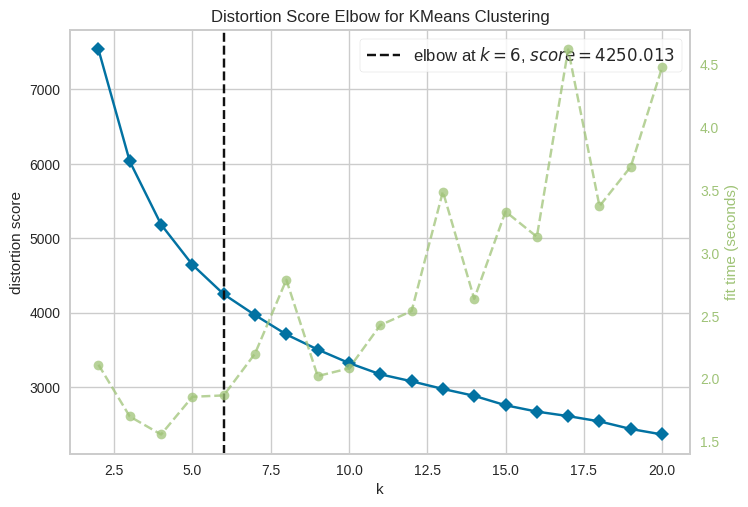

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=15)
visualizer = KElbowVisualizer(kmeans, k=(2, 21))
visualizer.fit(abt_seg_tipo_comida)
visualizer.show()

**<span style="color:blue"></span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

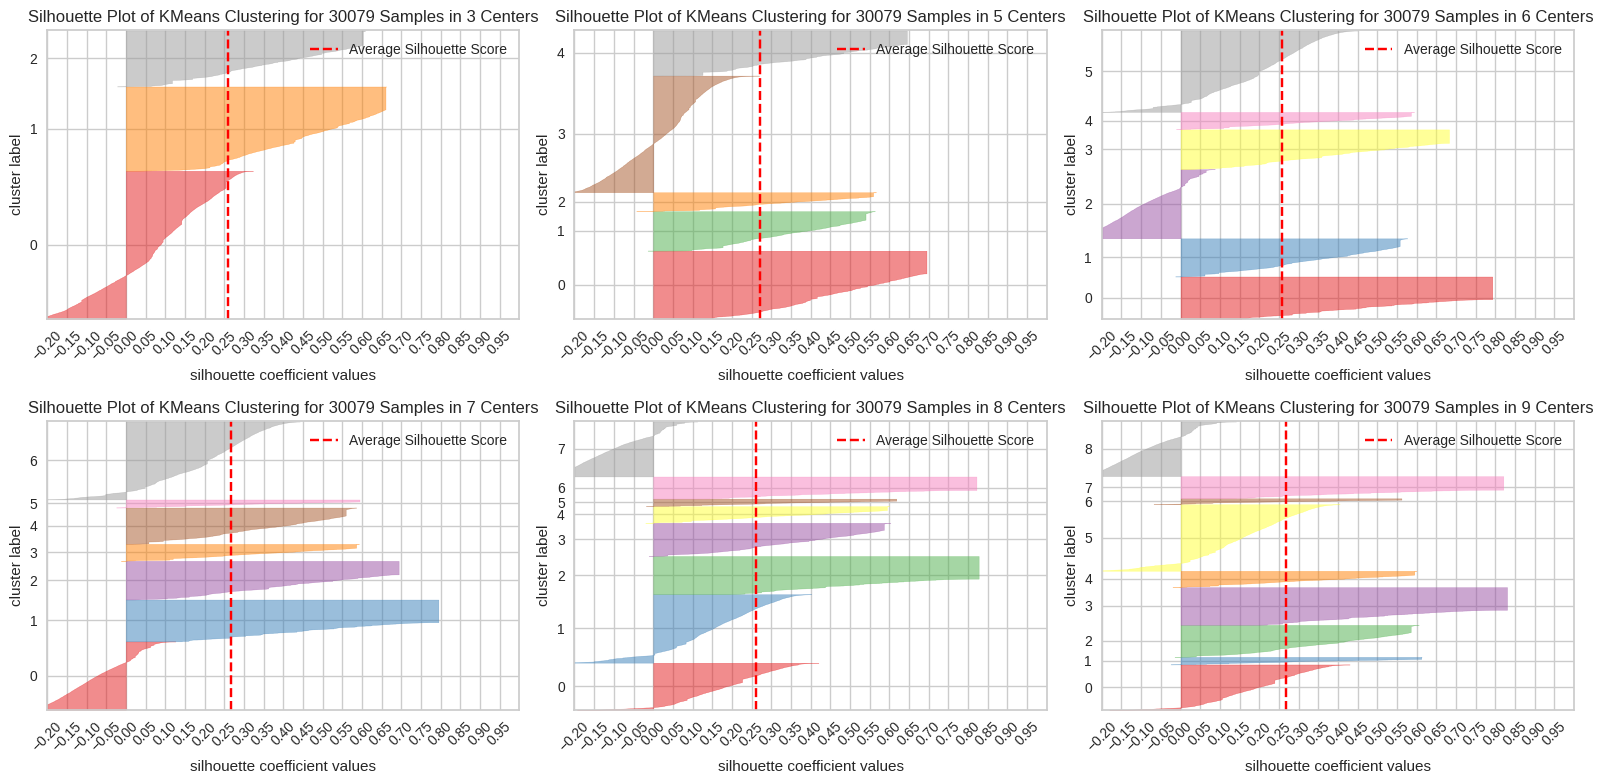

In [ ]:

import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.reshape(6)

# range(4, 8) irá gerar os valores 5, 6 e 7, 8 que queremos testar.
for i, k in enumerate([3, 5, 6, 7, 8, 9]):
    ax = axes[i]
    model = KMeans(n_clusters=k, random_state=42)
    sil_viz = SilhouetteVisualizer(model, ax=ax)
    sil_viz.fit(abt_seg_tipo_comida)
    sil_viz.finalize()
    ax.set_xlim(-0.2, 1)
    ax.set_xticks(np.arange(-0.2, 1, 0.05))
    ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


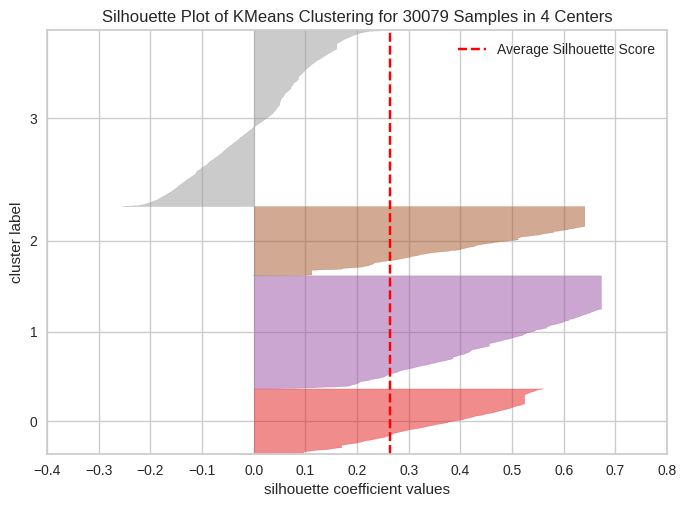

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30079 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
sil_viz = SilhouetteVisualizer(model)
sil_viz.fit(abt_seg_tipo_comida)
sil_viz.show()

**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crei uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=15)
kmeans.fit(abt_seg_tipo_comida)

abt_seg_tipo_comida['cluster_categorias'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**<span style="color:blue"></span> `Q5`** Faça a avaliação do ajuste do KMeans utilizando o Mapa de Calor.

O que podemos concluir?


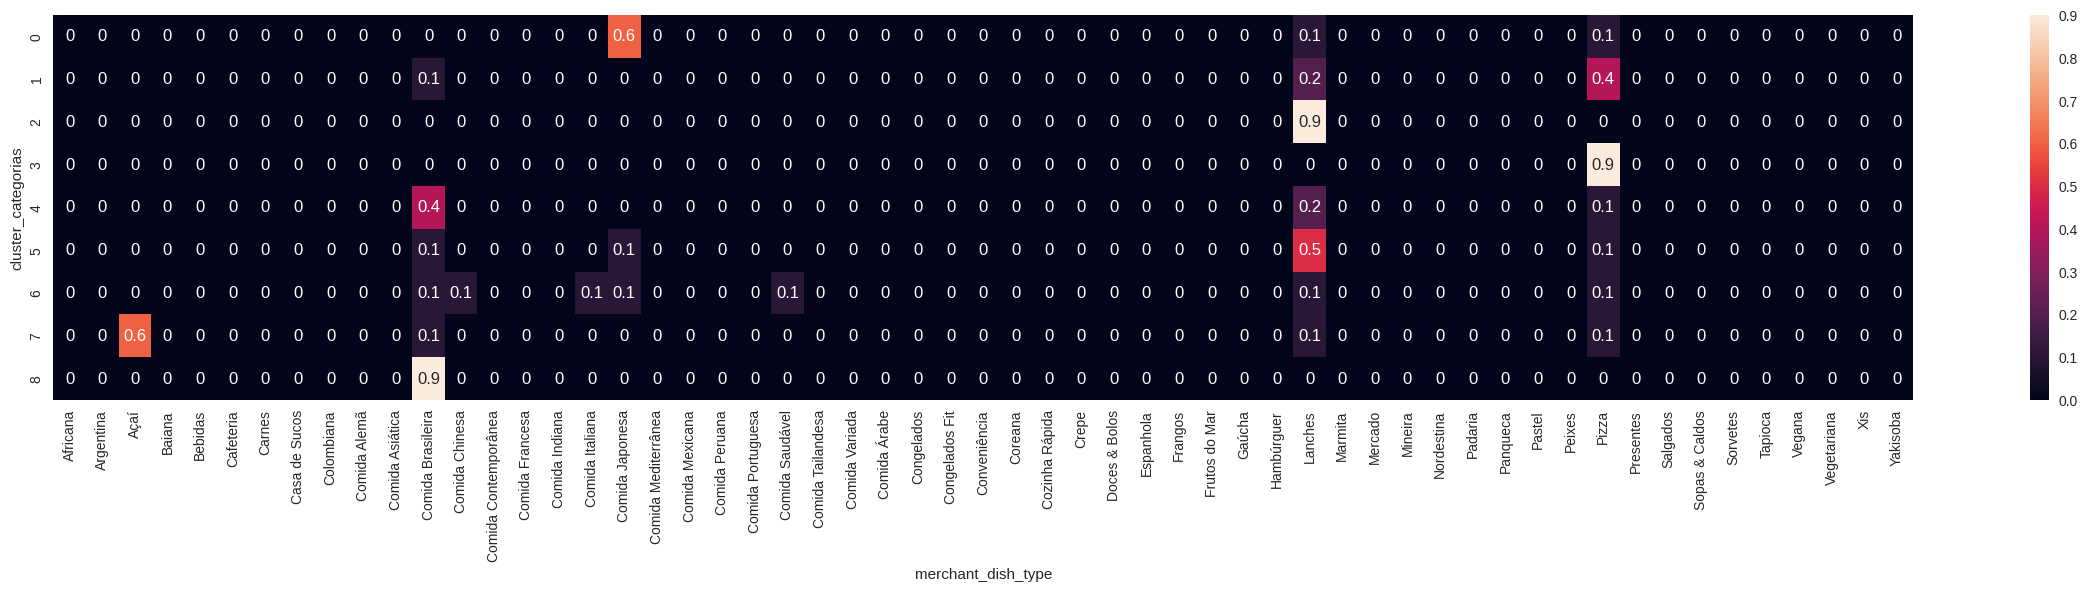

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 5))

sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias').mean().round(1), ax=ax, annot=True);

In [ ]:
df_orders['merchant_dish_type'].value_counts(1)[:2]

merchant_dish_type
Lanches              0.295821
Comida Brasileira    0.181963
Name: proportion, dtype: float64

**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo.
* Recupere as 9 features mais importantes.
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado.
* Faça uma análise do resultado obtido no mapa de calor.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(abt_seg_tipo_comida.drop('cluster_categorias', axis=1), abt_seg_tipo_comida['cluster_categorias'])

DecisionTreeClassifier()

In [ ]:
top_features = pd.Series(
        clf.feature_importances_,
        index=abt_seg_tipo_comida.drop('cluster_categorias', axis=1).columns.tolist()
    ).sort_values(ascending=False).head(9).index.tolist()
top_features

['Lanches',
 'Pizza',
 'Comida Brasileira',
 'Comida Japonesa',
 'Açaí',
 'Comida Saudável',
 'Comida Chinesa',
 'Comida Italiana',
 'Comida Árabe']

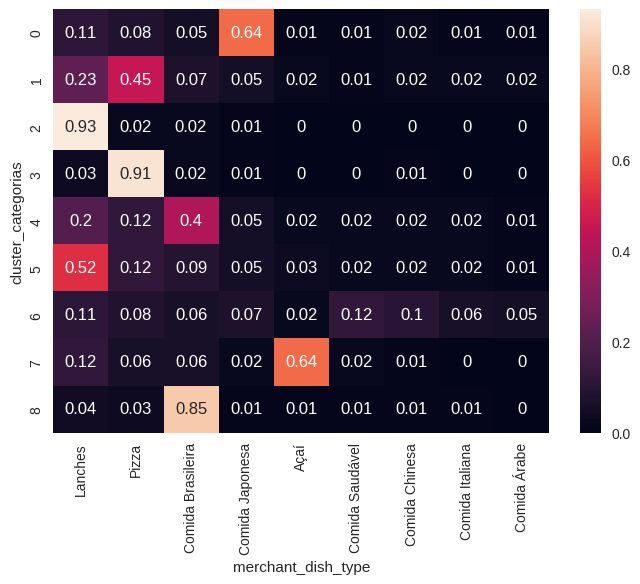

In [ ]:
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias')[top_features].mean().round(2), annot=True);

**<span style="color:blue">[RESPOSTA]:</span>**

# Segmentação por RFV

**<span style="color:blue"></span> `Q7`** Crie a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`.
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`.
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`.
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`.



In [ ]:
abt_rfv = (
    df_orders
    .groupby('customer_id')
    .agg(
        total_pedidos = ('order_id', 'count'),
        total_receita = ('order_total', 'sum')
    )
    .reset_index()
)

**<span style="color:blue"></span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [ ]:
abt_rfv['rank_pct_pedidos'] = abt_rfv['total_pedidos'].rank(pct=True)
abt_rfv['rank_pct_receita'] = abt_rfv['total_receita'].rank(pct=True)
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723


**<span style="color:blue"></span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

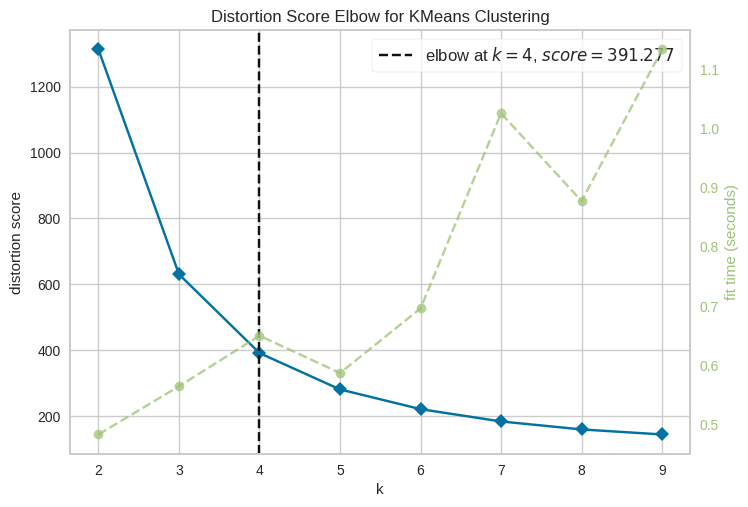

In [ ]:
kmeans = KMeans(random_state=15)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(abt_rfv[['rank_pct_receita', 'rank_pct_pedidos']])
visualizer.show();

**<span style="color:blue"></span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

In [ ]:
abt_rfv.head(3)

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(abt_rfv[['rank_pct_receita', 'rank_pct_pedidos']])

abt_rfv['cluster_fv'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**<span style="color:blue"></span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


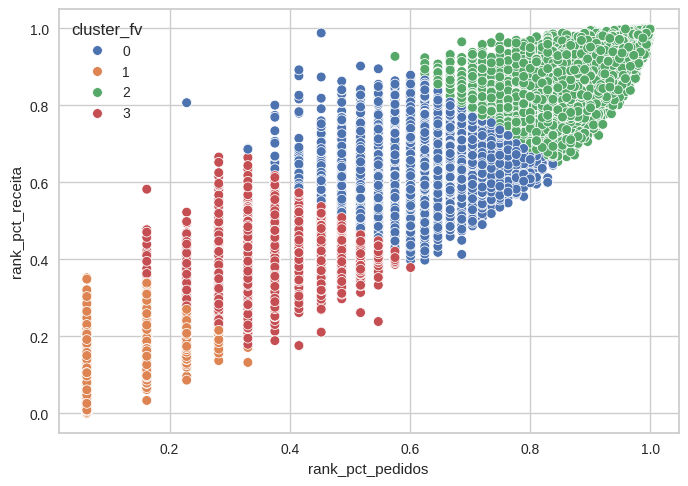

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=abt_rfv[['rank_pct_receita', 'rank_pct_pedidos', 'cluster_fv']], x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, palette='deep');

**<span style="color:blue"></span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

**<span style="color:blue"></span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

**<span style="color:blue"></span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

**<span style="color:blue"></span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.

**<span style="color:blue">[RESPOSTA]:</span>**
